# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
#!pip install praw

In [2]:
#Importing necessary libraries 
import praw
import pandas as pd

In [3]:
import credentials

In [4]:
#Initializing reddit connection
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [5]:
#Selected UFC as my subreddit of interest 
co_subreddit = reddit.subreddit('UFC').hot(limit=10)

In [6]:
for post in co_subreddit: 
    print(post.title, post.score)
    

🔴 !! Join The Elite on r/UFC Official Discord Server !! 🔴 // Link in below 12
[OFFICIAL] UFC Fight Night Live Discussion Thread 31
This was a savage line LMFAOO  1432
Jamahal failed the glove touch and tried to play it off with a chin scratch 903
This is Peak Jiri  2089
super hot take guys but I think the general public are aware that a bodybuilder would indeed lose to a professional fighter in a fight 2193
Ilia with the 10-8 roast 😂  488
Belal throwing back on topuria 213
Dustin Poirier via instagram. Who do guys think it is? 1215
Who is the hardest hitting 145er right here 543


In [7]:
#creating list and checking to see if I've accessed elements correctly
list(co_subreddit)

[]

In [8]:
co_subreddit = reddit.subreddit('UFC').top('month', limit=10)

C:\Users\thelo\AppData\Local\Temp\ipykernel_16516\4037921006.py:1: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  co_subreddit = reddit.subreddit('UFC').top('month', limit=10)


In [9]:
#using post function to post score
post.score

543

In [10]:
#posting title 
post.title

'Who is the hardest hitting 145er right here'

In [11]:
post.permalink

'/r/ufc/comments/1g2xey4/who_is_the_hardest_hitting_145er_right_here/'

In [12]:
#saving small amount of data from subreddit UFC
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('UFC').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [13]:
#Creating data frame 
co_df = pd.DataFrame(reddit_data)

In [14]:
#calling data frame
co_df

,title,link,author,n_comments,score,text
0,🔴 !! Join The Elite on r/UFC Official Discord ...,/r/ufc/comments/1eqm4ww/join_the_elite_on_rufc...,SomeRandomStarDude,1,13,[r/UFC Official Server Link](https://discord.g...
1,[OFFICIAL] UFC Fight Night Live Discussion Thread,/r/ufc/comments/1g2523f/official_ufc_fight_nig...,bruhpolice,935,31,
2,This was a savage line LMFAOO,/r/ufc/comments/1g317ga/this_was_a_savage_line...,brklynfightfan,108,1427,😁🤣😂 damn Topuria
3,Jamahal failed the glove touch and tried to pl...,/r/ufc/comments/1g3331l/jamahal_failed_the_glo...,Jr999977,118,902,
4,This is Peak Jiri,/r/ufc/comments/1g2srsy/this_is_peak_jiri/,KSK-Stryker,40,2087,2nd title run starts now 🗣️🗣️⚡️⚡️
...,...,...,...,...,...,...
910,Worst Ref I’ve seen Ever,/r/ufc/comments/1fx4him/worst_ref_ive_seen_ever/,spouiled,28,104,
911,"What’s black, white and red all over? THIS MAN...",/r/ufc/comments/1fxaa6g/whats_black_white_and_...,Lopsided-Memory-4247,3,36,
912,Me waiting for the Main Event damn knowing tha...,/r/ufc/comments/1fx8k5y/me_waiting_for_the_mai...,Axsonjaxson16,18,51,
913,This is an entertainment sport . Fighters shou...,/r/ufc/comments/1fx7o57/this_is_an_entertainme...,cellation,10,60,Nick Diaz is right when he was talking about t...


In [15]:
#Importing sqlite3 
import sqlite3

In [16]:
#Saving data to sqlite3
con = sqlite3.connect(r"C:\Users\thelo\OneDrive\Documentos\School\MSDS_600\Week_7_Assignment\data\co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

915

In [17]:
#Checking to see if data saved properly
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,🔴 !! Join The Elite on r/UFC Official Discord ...,/r/ufc/comments/1eqm4ww/join_the_elite_on_rufc...,SomeRandomStarDude,1,13,[r/UFC Official Server Link](https://discord.g...
1,[OFFICIAL] UFC Fight Night Live Discussion Thread,/r/ufc/comments/1g2523f/official_ufc_fight_nig...,bruhpolice,935,31,
2,This was a savage line LMFAOO,/r/ufc/comments/1g317ga/this_was_a_savage_line...,brklynfightfan,108,1427,😁🤣😂 damn Topuria
3,Jamahal failed the glove touch and tried to pl...,/r/ufc/comments/1g3331l/jamahal_failed_the_glo...,Jr999977,118,902,
4,This is Peak Jiri,/r/ufc/comments/1g2srsy/this_is_peak_jiri/,KSK-Stryker,40,2087,2nd title run starts now 🗣️🗣️⚡️⚡️
...,...,...,...,...,...,...
910,Worst Ref I’ve seen Ever,/r/ufc/comments/1fx4him/worst_ref_ive_seen_ever/,spouiled,28,104,
911,"What’s black, white and red all over? THIS MAN...",/r/ufc/comments/1fxaa6g/whats_black_white_and_...,Lopsided-Memory-4247,3,36,
912,Me waiting for the Main Event damn knowing tha...,/r/ufc/comments/1fx8k5y/me_waiting_for_the_mai...,Axsonjaxson16,18,51,
913,This is an entertainment sport . Fighters shou...,/r/ufc/comments/1fx7o57/this_is_an_entertainme...,cellation,10,60,Nick Diaz is right when he was talking about t...


<Axes: ylabel='Frequency'>

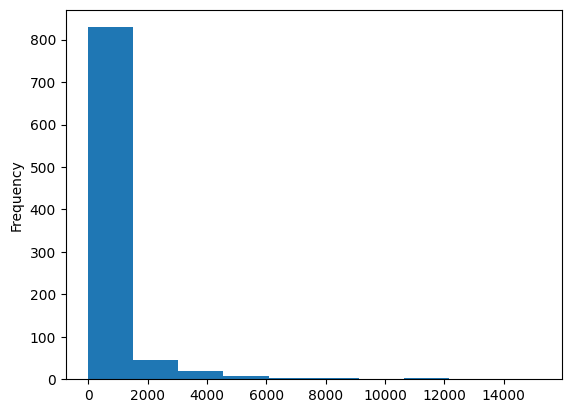

In [20]:
#EDA on UFC Reddit data. 
co_df['score'].plot.hist(bins=10)

In [21]:
co_df[co_df['score'] > 5000]

,title,link,author,n_comments,score,text
31,It’s actually happening!,/r/ufc/comments/1g24t1j/its_actually_happening/,_brightsidesuicide_,644,7871,
88,Pereira’s sister’s left hook,/r/ufc/comments/1g1pmof/pereiras_sisters_left_...,Ok_Smell_5379,550,10460,.
161,This shi had me rolling,/r/ufc/comments/1g16g1f/this_shi_had_me_rolling/,thereal_Xy,135,6935,I mean Nate does sound like Walter Jr.😭😭😭
238,6 years ago this week... The humbling of the c...,/r/ufc/comments/1g0lpcj/6_years_ago_this_week_...,okbutimstillhungry,280,7353,
269,Dana’s face 😂,/r/ufc/comments/1g0d2v7/danas_face/,eliots12,149,5211,Hahaha the difference \n\n
312,😭😭,/r/ufc/comments/1fzv56j/_/,ilovepoopypants,488,5800,
352,Old Volk returns,/r/ufc/comments/1fzjk53/old_volk_returns/,Sir_Shax,245,8386,
389,HEAVYWEIGHT PEREIRA,/r/ufc/comments/1fz7p3r/heavyweight_pereira/,Objective_Regular158,557,5686,
452,Khalil Rountree receives a heartwarming welcom...,/r/ufc/comments/1fykh7i/khalil_rountree_receiv...,ilovepoopypants,169,6250,
548,Khalil Rountree on his fight with Pereira,/r/ufc/comments/1fxqmqp/khalil_rountree_on_his...,MA-JA-HO,531,11425,


In [24]:
co_df[co_df['score'] > 1000]['link'].to_list()

['/r/ufc/comments/1g317ga/this_was_a_savage_line_lmfaoo/',
 '/r/ufc/comments/1g2srsy/this_is_peak_jiri/',
 '/r/ufc/comments/1g2q3it/super_hot_take_guys_but_i_think_the_general/',
 '/r/ufc/comments/1g2t267/dustin_poirier_via_instagram_who_do_guys_think_it/',
 '/r/ufc/comments/1g2mkpu/babe_the_new_mcgregor_reel_has_dropped/',
 '/r/ufc/comments/1g2j0nx/the_difference_5_years_can_make/',
 '/r/ufc/comments/1g2fki7/khalil_healing_up_nicely/',
 '/r/ufc/comments/1g24t1j/its_actually_happening/',
 '/r/ufc/comments/1g28y6t/promoter_conor_mcgregor_in_the_building_why_is_he/',
 '/r/ufc/comments/1g2fiqx/build_this_dude_a_statue_in_brazil_hes_never/',
 '/r/ufc/comments/1g2dfcc/i_aint_know_he_was_a_pawg_bro/',
 '/r/ufc/comments/1g253di/ufc_debut_and_title_shot/',
 '/r/ufc/comments/1g22nkv/please_god_help_max_win_theres_never_been_an/',
 '/r/ufc/comments/1g23oq7/here_we_go/',
 '/r/ufc/comments/1g21a5g/its_been_1_year_since_islam_makhachev_shocked_the/',
 '/r/ufc/comments/1g1pmof/pereiras_sisters_left_

<Axes: >

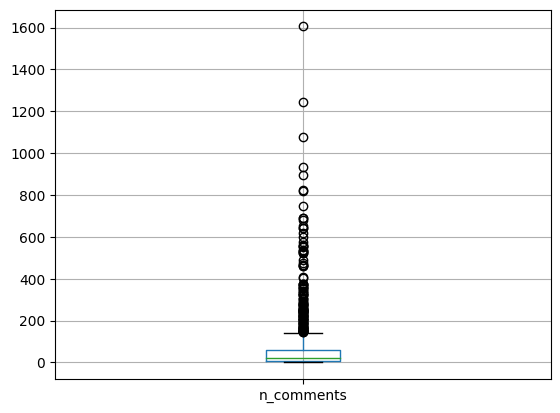

In [25]:
#Creating boxplot
co_df.boxplot('n_comments')

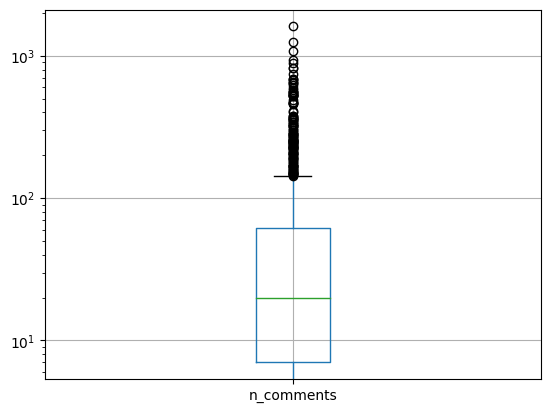

In [26]:
#Importing matplotlib and creating bar plot.
import matplotlib.pyplot as plt
co_df.boxplot('n_comments')
plt.yscale('log')

<Axes: xlabel='score', ylabel='n_comments'>

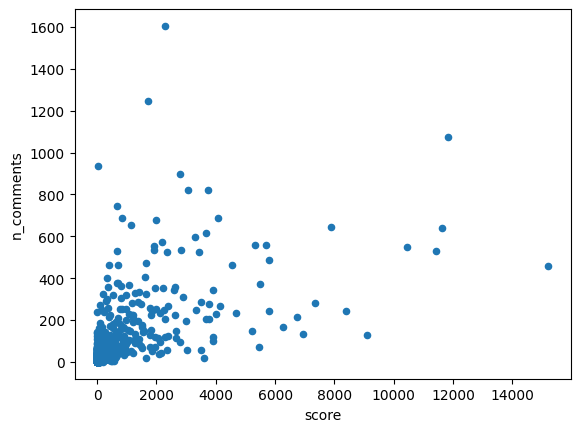

In [27]:
#Creating scatter plot
co_df.plot.scatter(x='score', y='n_comments')

<Axes: xlabel='author'>

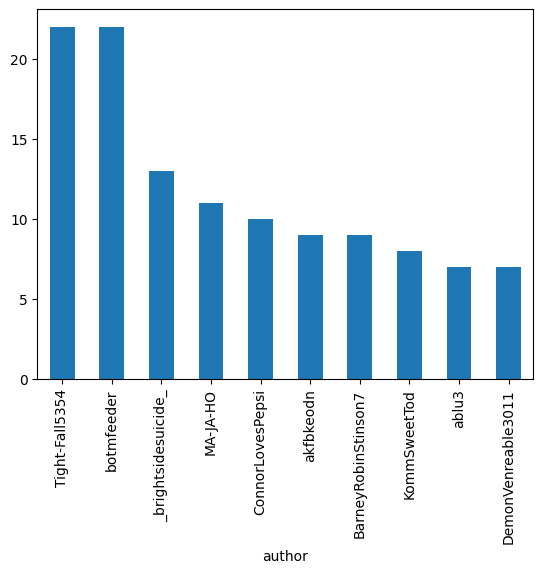

In [28]:
#Creating bar plot to look at frequency counts
co_df['author'].value_counts()[:10].plot.bar()

In [29]:
#looking at individual author 'botmfeeder'
co_df[co_df['author'] == 'botmfeeder']

,title,link,author,n_comments,score,text
38,IT LOOKS LIKE ROYVAL STOPPED THE TRAIN!,/r/ufc/comments/1g2f914/it_looks_like_royval_s...,botmfeeder,167,885,
41,"THIS IS INSANE, AND ITS ONLY ROUND 4!",/r/ufc/comments/1g2f1y5/this_is_insane_and_its...,botmfeeder,52,639,
57,3 attempted robberies from Sal D'amato. I woul...,/r/ufc/comments/1g2fbrz/3_attempted_robberies_...,botmfeeder,71,269,
103,Junior Tafa wins the Battle of Attrition,/r/ufc/comments/1g2amgy/junior_tafa_wins_the_b...,botmfeeder,39,96,
114,The next few cards look insane,/r/ufc/comments/1g2fclt/the_next_few_cards_loo...,botmfeeder,10,25,
122,In what world does Morono win that 2nd round? ...,/r/ufc/comments/1g2cvwi/in_what_world_does_mor...,botmfeeder,17,30,
135,Did we really just watch Grant Dawson get a na...,/r/ufc/comments/1g2dbd6/did_we_really_just_wat...,botmfeeder,4,13,
141,"Fire Sal D'amato, 29-28 Mckenna how??",/r/ufc/comments/1g2a9ys/fire_sal_damato_2928_m...,botmfeeder,4,20,
168,Who gave this lady a seat?,/r/ufc/comments/1g2a2xm/who_gave_this_lady_a_s...,botmfeeder,0,8,
189,Cruz and Bisping said they had no idea who won,/r/ufc/comments/1g29pbf/cruz_and_bisping_said_...,botmfeeder,6,3,


In [30]:
#!conda install -c conda-forge nltk -y

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\thelo\anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.9.1               |  py312h2e8e312_0         1.1 MB  conda-forge
    joblib-1.4.2               |     pyhd8ed1ab_0         215 KB  conda-forge
    libexpat-2.6.2             |       h63175ca_0         136 KB  conda-forge
    libsqlite-3.46.1           |       h2466b09_0         856 KB  conda-forge
    libzlib-1.2.13             |       h2466b09_6          55 KB  conda-forge
    nltk-3.9.1                 |     pyhd8ed1ab_0         1.0 MB  conda-forge
    python-3.12.3              |h2628c8c_0_cpython        15.4 MB  c

'L' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
#implementing sting methods
import nltk

fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(20)

[('the', 272),
 ('a', 184),
 ('to', 171),
 ('of', 120),
 ('is', 117),
 ('in', 114),
 ('this', 97),
 ('and', 86),
 ('UFC', 82),
 ('for', 80),
 ('on', 79),
 ('fight', 65),
 ('his', 61),
 ('he', 60),
 ('I', 59),
 ('you', 59),
 ('Alex', 57),
 ('Pereira', 52),
 ('be', 50),
 ('that', 49)]

<Axes: xlabel='Samples', ylabel='Counts'>

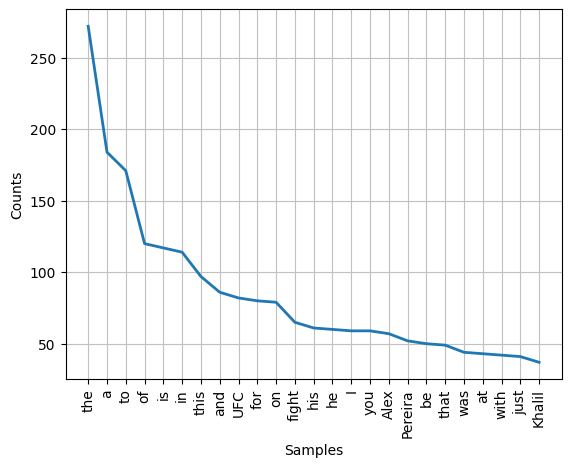

In [36]:
fd.plot(25)

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thelo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [38]:
#Cleaning words so that the plot is visually cleaner and gives us more valuable information
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
words = ' '.join(co_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [40]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('ufc', 86),
 ('fight', 70),
 ('alex', 58),
 ('pereira', 57),
 ('khalil', 42),
 ('like', 33),
 ('would', 31),
 ('one', 30),
 ('poatan', 30),
 ('vs', 29),
 ('fighter', 28),
 ('think', 27),
 ('rountree', 22),
 ('ilia', 21),
 ('beat', 21),
 ('still', 21),
 ('get', 20),
 ('conor', 19),
 ('time', 18),
 ('next', 18)]

<Axes: xlabel='Samples', ylabel='Counts'>

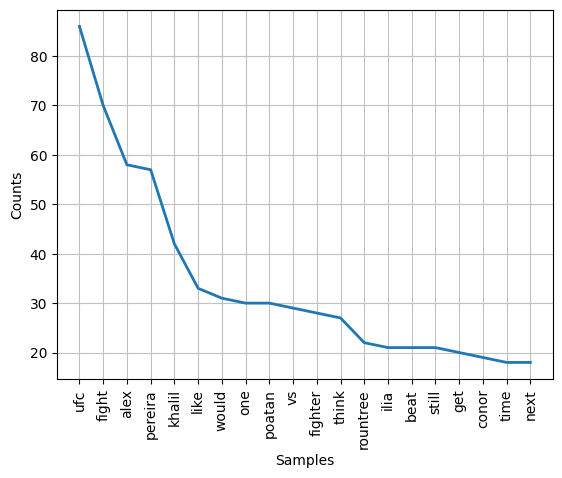

In [41]:
cleaned_fd.plot(20)

In [45]:
con = sqlite3.connect(r'C:\Users\thelo\OneDrive\Documentos\School\MSDS_600\Week_7_Assignment\data\co_reddit.sqlite')
test_df = pd.read_sql_query('SELECT title, n_comments FROM posts;', con)
con.close()
test_df

,title,n_comments
0,🔴 !! Join The Elite on r/UFC Official Discord ...,1
1,[OFFICIAL] UFC Fight Night Live Discussion Thread,935
2,This was a savage line LMFAOO,108
3,Jamahal failed the glove touch and tried to pl...,118
4,This is Peak Jiri,40
...,...,...
910,Worst Ref I’ve seen Ever,28
911,"What’s black, white and red all over? THIS MAN...",3
912,Me waiting for the Main Event damn knowing tha...,18
913,This is an entertainment sport . Fighters shou...,10


In [47]:
#Tried extracting a larger amount of data from the subreddit, but was having trouble getting it to save. It seemed that there was too much data to collect? Will spend more time figuring this out throughout the week.
reddit_posts_data = {'title': [],
                    'link': [],
                    'author': [],
                    'n_comments': [],
                    'score': [],
                    'text': [],
                    'id': []}

reddit_comments_data = {'author': [],
                        'score': [],
                        'text': [],
                        'post_id': []}


co_subreddit = reddit.subreddit('UFC').new(limit=None)

for post in list(co_subreddit):
    reddit_posts_data['title'].append(post.title)
    reddit_posts_data['link'].append(post.permalink)
    if post.author is None:
        reddit_posts_data['author'].append(None)
    else:
        reddit_posts_data['author'].append(post.author.name)
    reddit_posts_data['n_comments'].append(post.num_comments)
    reddit_posts_data['score'].append(post.score)
    reddit_posts_data['text'].append(post.selftext)
    reddit_posts_data['id'].append(post.id)

    post.comments.replace_more(limit=None)
    for comment in post.comments:
        if comment.author is None:
            reddit_comments_data['author'].append('')
        else:
            reddit_comments_data['author'].append(comment.author.name)
        reddit_comments_data['score'].append(comment.score)
        reddit_comments_data['text'].append(comment.body)
        reddit_comments_data['post_id'].append(post.id)

post_df = pd.DataFrame(reddit_posts_data)
comment_df = pd.DataFrame(reddit_comments_data)

con = sqlite3.connect(r'C:\Users\thelo\OneDrive\Documentos\School\MSDS_600\Week_7_Assignment\data\co_reddit.sqlite')
post_df.to_sql('posts', con, if_exists='replace')
comment_df.to_sql('comments', con, if_exists='replace')
con.close()

TooManyRequests: received 429 HTTP response

# Analysis

This assignment was fun. When extracting and saving the data from my subreddit of interest, I worked throught he FTE and used new function I hadn't seen prior. I started by extracting my data from the subreddit page 'UFC', then saved the data. Once the data was saved properly, I did some basic EDA using bar plots, scatter plots, and box plots. I then created more plots and used sting methods (join and split) to learn how to both join a list of strings and split characters based on what I choose as an argument. The graph presented wasn't telling us much due to all the words that were unnecessary. I then cleaned the words by removing these words (the, a, at, etc.) and created a graph that was a lot cleaner. At the end of my code, I tried to implement much larger data, but ran into issues as seen above. I plan to trouble shoot this more this week to figure out to analyse larger sets of data. 